In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

# Domain decomposition method (DDM)
## Test1 of L-shape domain problem in IJNME

<br />
<img align="left" src="img/Test1.png" alt="Drawing" style="width: 600px;"/>
<br /><br /><br />

### Step1. Setup BEM subdomains

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:8(Total) 8(Edge) 0(Trace)
[Mesh] Number of Nodes:24(Total) 24(Edge) 0(Trace) 0(Source)


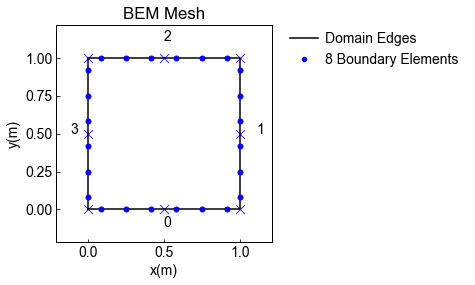

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:10(Total) 10(Edge) 0(Trace)
[Mesh] Number of Nodes:30(Total) 30(Edge) 0(Trace) 0(Source)


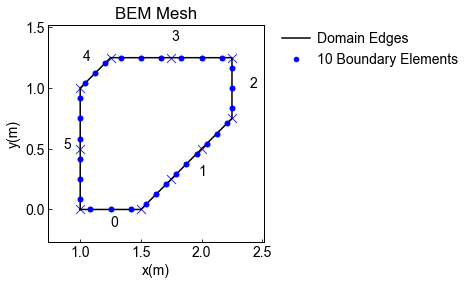

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, 10)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:8(Total) 8(Edge) 0(Trace)
[Mesh] Number of Nodes:24(Total) 24(Edge) 0(Trace) 0(Source)


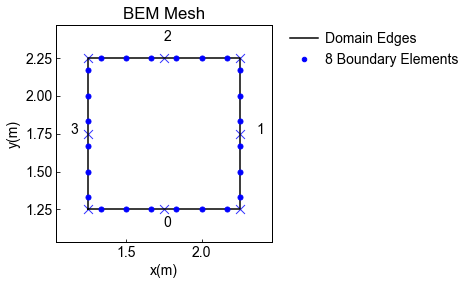

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(2, 100)]


In [2]:
#####Subdomain1########
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1/2.0

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,0)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

#####Subdomain2########
BEM_Case2=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (1.5, 0.0), (2.25, 0.75),(2.25,1.25),(1.25,1.25),(1.0, 1.0)] #Anti-clock wise for internal domain

BEM_Case2.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case2.plot_Mesh()

#2.Set Boundary condition
bc0=[(1,10)]
bc1=[(5,0),(3,0)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

#####Subdomain3########
BEM_Case3=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.25, 1.25), (2.25, 1.25), (2.25, 2.25), (1.25, 2.25)] #Anti-clock wise for internal domain

BEM_Case3.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case3.plot_Mesh()

#2.Set Boundary condition
bc0=[(2,100)]
bc1=[(0,0)]
BEM_Case3.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()


BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled

### Step2. Setup iterative coupling solver

In [3]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled

#Intersection 1
#Domain 0 <-> Domain 1
#BD 1 <-> BD 3
DomainID,BoundaryID=0,1
DomainID_connect,BoundaryID_connect=1,5
Intersect1=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

#Intersection 2
#Domain 1 <-> Domain 2
#BD 3 <-> BD 0
DomainID,BoundaryID=1,3
DomainID_connect,BoundaryID_connect=2,0
Intersect2=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

Intersections=[Intersect1,Intersect2]

### Step3. Parallel Robin-Robin Algorithm

[Solution] #DOFs= 24
[Solution] #DOFs= 30
[Solution] #DOFs= 24
2	0.5084541033586705		alpha:	0.5
4	0.16777443391774857		alpha:	1.000759492640953
6	0.041399265311530084		alpha:	1.9018932683489194
8	0.0010715129415591908		alpha:	0.6610085342701489
10	0.0035249176403439864		alpha:	4.229673694134093
12	0.0007094209806850311		alpha:	2.444636869075383
14	8.632042330547536e-05		alpha:	0.5586031059785448
16	8.178136346312561e-05		alpha:	2.4495562618957574
18	8.174206923064673e-05		alpha:	6.278161380406301
20	1.3566046971565496e-05		alpha:	0.5573273255107465
Converged at 21 Steps! TOL= 1e-05
Dirichelt [51.74183338 52.59057879 53.97694335 55.55545846 56.95417501 57.64933903]
Robin [106.60140746 104.49240458 101.53019807  98.30424887  94.89849276
  93.95525496]


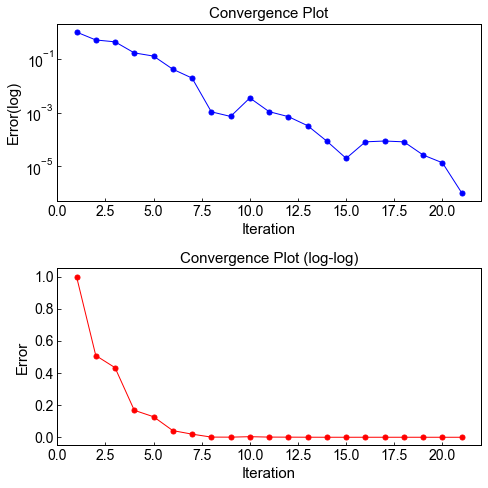

In [4]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=Intersections,plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-RR",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Neumann-Neumann Algorithm

[Solution] #DOFs= 24
[Solution] #DOFs= 30
[Solution] #DOFs= 24
2	0.0812647327135326		alpha:	0.5
Warning! Negative alpha!
4	0.010351197782033772		alpha:	0.12476255766861204
6	0.2674816340953066		alpha:	1.637394386669518
8	0.004798758739007819		alpha:	0.9434413005092103
10	0.0005240669698459588		alpha:	0.3905214082410605
12	0.0010018981260782437		alpha:	1.3271703915403235
14	0.00012099133054788788		alpha:	0.7748289937103024
16	0.00017516383221802506		alpha:	4.018626745575055
18	1.5188573379019927e-05		alpha:	0.19799219767585707
20	2.755113547380253e-05		alpha:	0.7541194511208726
Converged at 21 Steps! TOL= 1e-05
Dirichelt [ 0.00719506  0.00375168  0.00118877 -0.00075171 -0.00508078 -0.0042112 ]
Neumann [-14.52153729 -13.20509353 -11.26708459  -9.13279321  -7.08978743
  -6.27573264]


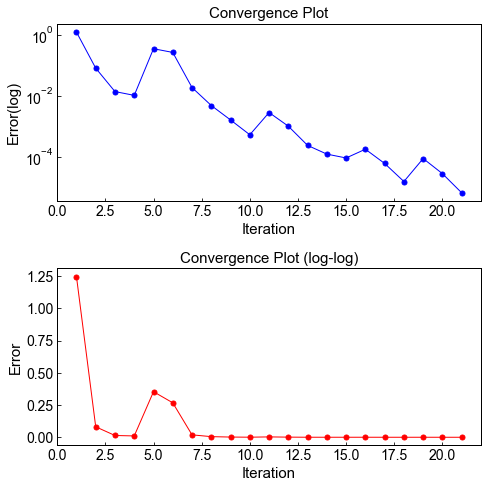

In [5]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=Intersections,plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-NN",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Dirichlet-Dirichlet Algorithm

[Solution] #DOFs= 24
[Solution] #DOFs= 30
[Solution] #DOFs= 24
2	0.2629885727036552		alpha:	0.5
4	0.09243921374154604		alpha:	0.09321171333006463
6	0.006830448938842966		alpha:	0.0354540510445174
8	0.0005920401051306533		alpha:	0.04741065704740831
10	0.0005393426776349973		alpha:	0.14726905447348912
12	9.554930133787825e-05		alpha:	0.03586779253335163
Converged at 13 Steps! TOL= 1e-05
Dirichelt [51.74154312 52.59051227 53.97703068 55.55562762 56.95419003 57.64914492]
Neumann [54.85717702 51.90065446 47.55816806 42.74700039 37.94737026 36.30363019]


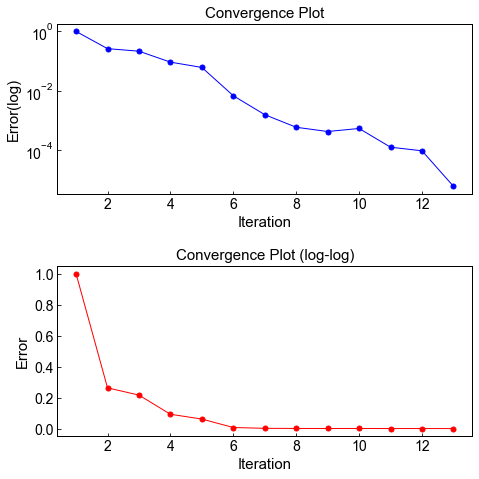

In [15]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=Intersections,plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-DD",TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 26
Total Number of Subdomains: 3


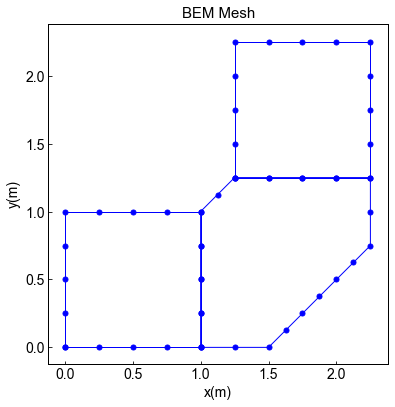

[Warnning] This method is not applicable for new input format


In [16]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

[Visulization] Plotting Solution


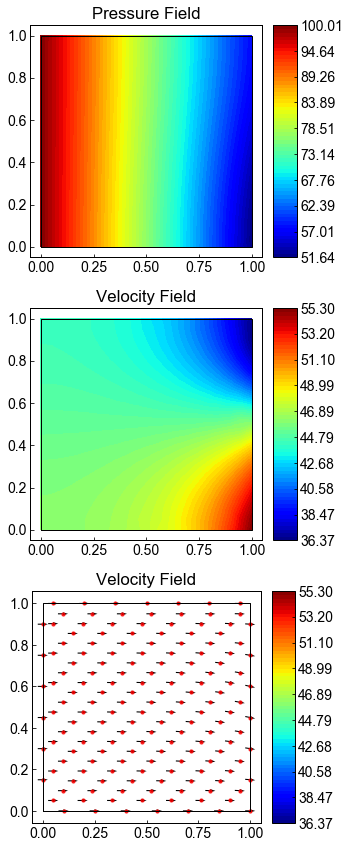

[Visulization] Plotting Solution


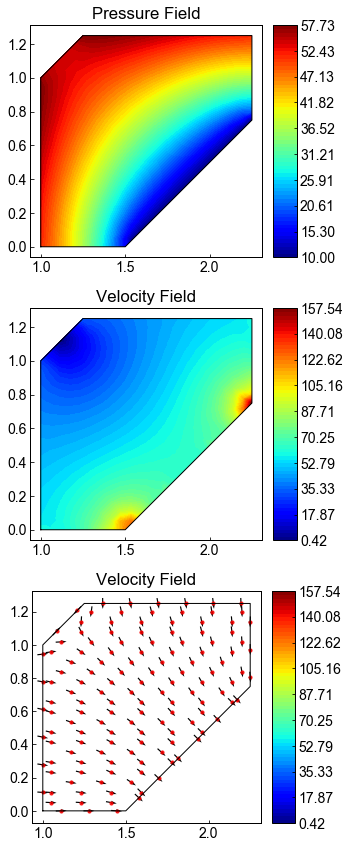

[Visulization] Plotting Solution


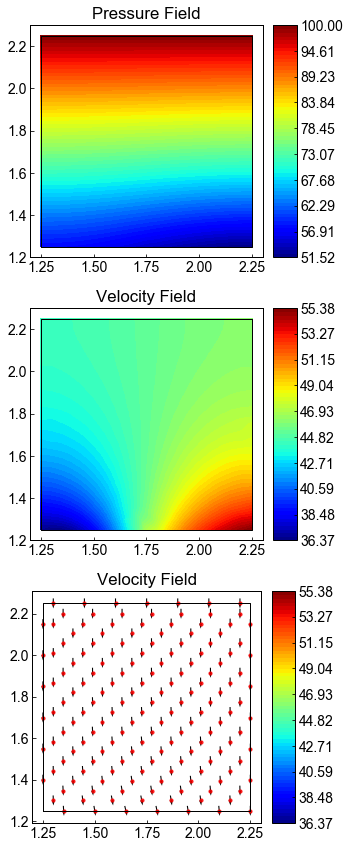

In [14]:
#Pressure and velocity contour results
PUV1=BEM_Case1.PostProcess.plot_Solution()
PUV2=BEM_Case2.PostProcess.plot_Solution()
PUV2=BEM_Case3.PostProcess.plot_Solution()

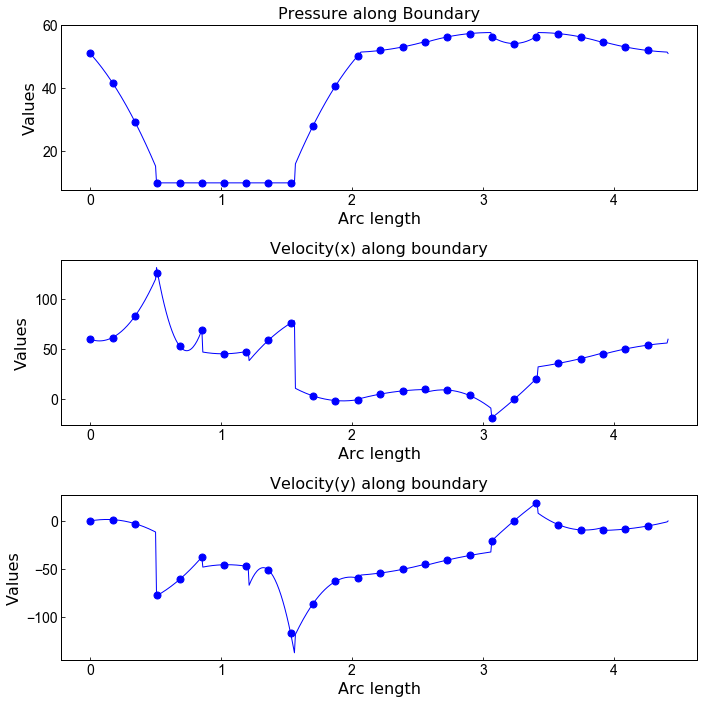

In [15]:
#Pressure and velocity along the boundary
P=BEM_Case2.PostProcess.plot_SolutionBD()